# 한국복지패널 데이터셋 분석하기

- https://www.koweps.re.kr:442
        
- 우리 나라의 각종 사회조사를 시행하고 데이터를 공개하는 사이트
- SAS라는 통계 분석 프로그램을 사용한 데이터 셋 파일을 제공
    - R로는 이 파일을 함수를 이용해 바로 불러올 수 있으나 Python은 불가능.
    - 예제에서 사용되는 데이터셋은 2017년도 조사 자료를 R에서 Excel형식으로 내보낸 파일임
    - 데이터셋의 각 변수명에 대한 의미는 http://itaper.co.kr/demo/python/codebook-excel.7z 참조

-----------------------
## #01. 필요한 패키지 및 샘플 데이터 가져오기

In [189]:
import numpy
from pandas import DataFrame
from pandas import ExcelFile
from matplotlib import pyplot

In [190]:
# 엑셀 파일을 원격으로 내려받아 데이터프레임으로 변환(다소 시간이 소요된다)
xlsx = ExcelFile("http://itpaper.co.kr/demo/python/dataset2017.xlsx")
df = xlsx.parse(xlsx.sheet_names[0])

In [191]:
df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


http://itpaper.co.kr/demo/python/dataset2017_fieldname.jpg<br>
http://itpaper.co.kr/demo/python/dataset2017_area.jpg<br>
http://itpaper.co.kr/demo/python/rsample.html


분석예제 1) 조사대상들에 대한 성별 분포

In [198]:
# 데이터프레임 복제
cp=df.copy()
cp

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [199]:
cp_ = cp.filter(['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7'])
cp_ = DataFrame(cp_)
cp_

,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [200]:
cp1 = cp_.filter(['h12_g3'])
cp1 = DataFrame(cp1)
cp1

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [259]:
cp1_=cp1.rename(columns={'h12_g3':'성별'})
cp1_

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [260]:
#성별의 데이터 분포 확인
cp1_['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [261]:
# 성별값을 반환
cp1_['성별'] = numpy.where(cp1_['성별'] == 1,'남자','여자')
cp1_

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


In [268]:
# 변환된 값에 의한 성별 데이터 분포를 데이터프레임으로 만들기
vcount = cp1_['성별'].value_counts()
type(vcount)
성별df = DataFrame(vcount)
성별df

,성별
여자,8440
남자,6982


In [269]:
#생성된 데이터 프레임의 컬럼이름 변경
성별df.rename(columns={'성별':'명'}, inplace = True)
성별df

,명
여자,8440
남자,6982


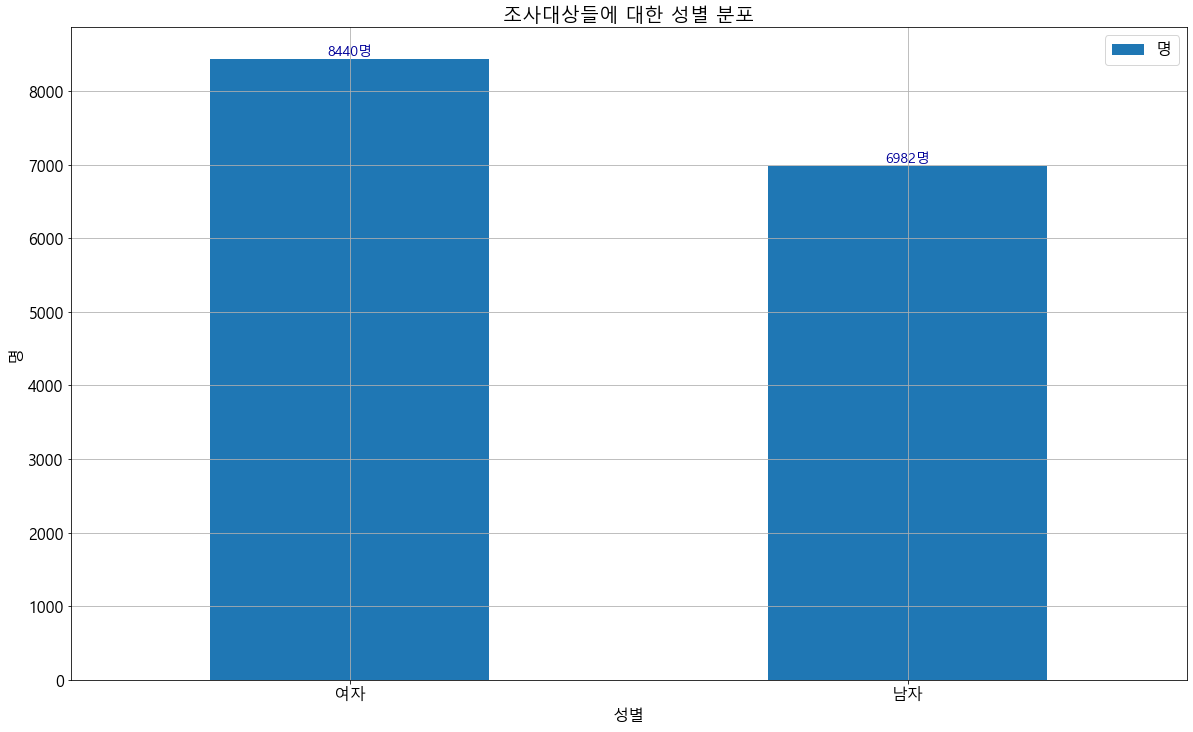

In [270]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별df.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("조사대상들에 대한 성별 분포")
pyplot.xlabel("성별")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별df['명'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

분석예제 2) 성별에 따른 월급 차이 분석

In [203]:
cp2 = cp_.filter(['h12_g3','p1202_8aq1'])
cp2 = DataFrame(cp2)
cp2

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [204]:
cp2_결측치여부 = cp2.isnull()
cp2_결측치여부

,h12_g3,p1202_8aq1
0,False,True
1,False,True
2,False,True
3,False,False
4,False,True
...,...,...
15417,False,True
15418,False,True
15419,False,False
15420,False,True


In [206]:
# 각 열단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
from sklearn.impute import SimpleImputer #sklearn은 tensorflow 보다 수학공식 일일히 안써도 되서 좋다. 그러나 속도가 tensorflow보다 느리다
정제규칙=SimpleImputer(missing_values=numpy.nan, strategy='mean')
정제규칙

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [207]:
정제규칙_적용결과 = 정제규칙.fit_transform(cp2.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[  2.        , 257.95007322],
       [  2.        , 257.95007322],
       [  1.        , 257.95007322],
       ...,
       [  1.        ,  72.        ],
       [  2.        , 257.95007322],
       [  1.        , 257.95007322]])

In [208]:
cp2_정제결과 = DataFrame(정제규칙_적용결과,index=cp2.index, columns=cp2.columns)
cp2_정제결과

,h12_g3,p1202_8aq1
0,2.0,257.950073
1,2.0,257.950073
2,1.0,257.950073
3,1.0,108.900000
4,2.0,257.950073
...,...,...
15417,2.0,257.950073
15418,2.0,257.950073
15419,1.0,72.000000
15420,2.0,257.950073


In [ ]:
분석예제 3) 나이에 따른 월급 평균의 변화

In [211]:
cp3 = cp_.filter(['h12_g3','h12_g4','p1202_8aq1'])
cp3 = DataFrame(cp3)
cp3

,h12_g3,h12_g4,p1202_8aq1
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


In [212]:
cp3=cp3.rename(
    columns={'h12_g3':'성별','h12_g4':'나이','p1202_8aq1':'월급'})
cp3

,성별,나이,월급
0,2,1936,NaN
1,2,1945,NaN
2,1,1948,NaN
3,1,1942,108.9
4,2,1923,NaN
...,...,...,...
15417,2,1967,NaN
15418,2,1992,NaN
15419,1,1995,72.0
15420,2,1998,NaN


In [213]:
cp3_결측치여부 = cp3.isnull()
cp3_결측치여부

,성별,나이,월급
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,False
4,False,False,True
...,...,...,...
15417,False,False,True
15418,False,False,True
15419,False,False,False
15420,False,False,True


In [215]:
# 각 열단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
from sklearn.impute import SimpleImputer #sklearn은 tensorflow 보다 수학공식 일일히 안써도 되서 좋다. 그러나 속도가 tensorflow보다 느리다
정제규칙=SimpleImputer(missing_values=numpy.nan, strategy='mean')
정제규칙

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

cp3_정제규칙_적용결과 = 정제규칙.fit_transform(cp3.values)
print(type(cp3_정제규칙_적용결과))
cp3_정제규칙_적용결과

In [216]:
cp3_정제규칙_적용결과 = 정제규칙.fit_transform(cp3.values)
print(type(cp3_정제규칙_적용결과))
cp3_정제규칙_적용결과

<class 'numpy.ndarray'>


array([[2.00000000e+00, 1.93600000e+03, 2.57950073e+02],
       [2.00000000e+00, 1.94500000e+03, 2.57950073e+02],
       [1.00000000e+00, 1.94800000e+03, 2.57950073e+02],
       ...,
       [1.00000000e+00, 1.99500000e+03, 7.20000000e+01],
       [2.00000000e+00, 1.99800000e+03, 2.57950073e+02],
       [1.00000000e+00, 2.00100000e+03, 2.57950073e+02]])

In [221]:
cp3_정제결과 = DataFrame(cp3_정제규칙_적용결과,index=cp3.index, columns=cp3.columns)
cp3_정제결과

,성별,나이,월급
0,2.0,1936.0,257.950073
1,2.0,1945.0,257.950073
2,1.0,1948.0,257.950073
3,1.0,1942.0,108.900000
4,2.0,1923.0,257.950073
...,...,...,...
15417,2.0,1967.0,257.950073
15418,2.0,1992.0,257.950073
15419,1.0,1995.0,72.000000
15420,2.0,1998.0,257.950073


In [222]:
cp3_정제결과 = cp3_정제결과.filter(['나이','월급'])
cp3_정제결과 = DataFrame(cp3_정제결과)
cp3_정제결과

,나이,월급
0,1936.0,257.950073
1,1945.0,257.950073
2,1948.0,257.950073
3,1942.0,108.900000
4,1923.0,257.950073
...,...,...
15417,1967.0,257.950073
15418,1992.0,257.950073
15419,1995.0,72.000000
15420,1998.0,257.950073


In [224]:
# x좌표를 의미할 리스트나 배열 생성
xpos = numpy.arange(len(cp3_정제결과))
xpos


# x좌표에 적용할 텍스트의 리스트 생성
xtext = list(cp3_정제결과.index)
xtext




[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


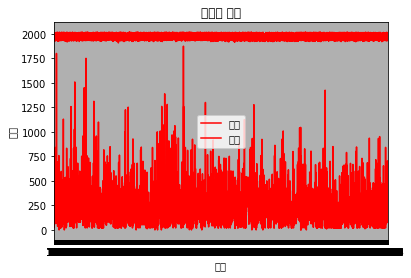

In [225]:
# 특정컬럼에 대해서만 시각화 하기
cp3_정제결과.plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("나이별 급여")
pyplot.xlabel("나이")
pyplot.ylabel("급여")
pyplot.xticks(xpos, xtext)
pyplot.show()

In [ ]:
분석예제 4) 연령대별 월급 평균 분포

In [ ]:
분석예제 5) 연령대와 성별에 따른 월급 평균

In [226]:
분석예제 6) 지역별 연령대 비율

SyntaxError: invalid syntax (<ipython-input-226-b92ee1302e0f>, line 1)

# <정답>

## 분석예제 1)조사대상들에 대한 성별 분포

In [248]:
# 성별 컬럼만 추출
df_filter = df.filter(['h12_g3'])
df_filter

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [249]:
# 성별 변수의 이름을 인식하기 쉬운 값으로 변경하기
df_filter.rename(columns={'h12_g3':'성별'}, inplace=True)
df_filter

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [250]:
#성별의 데이터 타입 확인
df_filter['성별']

0        2
1        2
2        1
3        1
4        2
        ..
15417    2
15418    2
15419    1
15420    2
15421    1
Name: 성별, Length: 15422, dtype: int64

In [251]:
#결측치 확인
df_filter.isna().sum()

성별    0
dtype: int64

In [252]:
#성별의 데이터 분포 확인
df_filter['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [253]:
# 성별값을 반환
df_filter['성별'] = numpy.where(df_filter['성별'] == 1,'남자','여자')
df_filter

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


In [254]:
# 변환된 값에 의한 성별 데이터 분포를 데이터프레임으로 만들기
vcount = df_filter['성별'].value_counts()
type(vcount)
성별df = DataFrame(vcount)
성별df

,성별
여자,8440
남자,6982


In [256]:
#생성된 데이터 프레임의 컬럼이름 변경
성별df.rename(columns={'성별':'명'}, inplace = True)
성별df

,명
여자,8440
남자,6982


In [257]:
# 비율순으로 정렬
성별df.sort_values('명',inplace=True)
성별df

,명
남자,6982
여자,8440


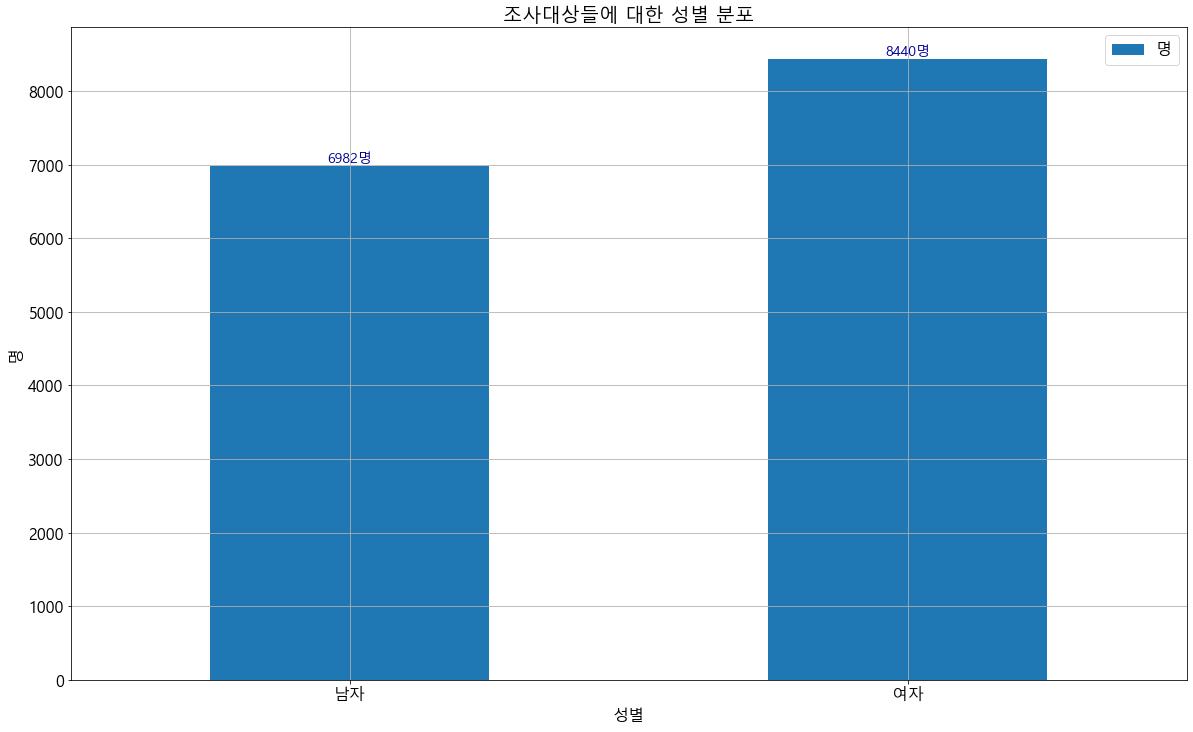

In [258]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별df.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("조사대상들에 대한 성별 분포")
pyplot.xlabel("성별")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별df['명'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

## 분석예제 2)성별에 따른 평균 월급 차이 분석

1단계-변수 검토 및 전처리

In [262]:
# 성별과 월급 데이터만 추출
df_filter2 = df.filter(['h12_g3','p1202_8aq1'])
df_filter2

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [263]:
# 변수 이름 변경하기
df_filter2.rename(columns={'h12_g3':'성별','p1202_8aq1':'월급'}, inplace=True)
df_filter2

,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [264]:
# 성별 항목 이름 부여
df_filter2['성별'] = numpy.where(df_filter2['성별'] == 1, '남자','여자')
df_filter2

,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


2단계-데이터분포 확인
- 성별과 같은 문자열(charator) 데이터들은 value_counts()함수를 사용하여 데이터 빈도를 확인
- 월급과 같이 숫자 형식의 연속적 데이터는 describe() 함수로 요약 내용을 확인해야 한다

In [266]:
df_filter2['성별'].value_counts()

여자    8440
남자    6982
Name: 성별, dtype: int64

In [267]:
df_filter2['월급'].describe()

count    4507.000000
mean      257.950073
std       192.706107
min         0.000000
25%       135.000000
50%       208.000000
75%       336.000000
max      1874.000000
Name: 월급, dtype: float64

3단계-데이터정제

- 코드표에 의하면 월급 데이터의 경우 1~9998 사이의 값을 갖는다고 되어 있다
- 모름/무응답의 경우 9999로 저장되어 0인 경우는 데이터가 없는 상태이므로 이 두 상태를 이상치로 봐야 한다

In [285]:
# 이상치 결측 처리
# ---> 0, 9999 둘 중 하나인 값을 결측치로 변경
df_filter2['월급'] = numpy.where(((df_filter2['월급'] < 1) | (df_filter2['월급'] > 9998)), numpy.nan, df_filter2['월급'])
df_filter2

,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [286]:
# 결측치 확인
df_filter2.isna().sum()

성별        0
월급    10929
dtype: int64

In [287]:
# 결측치가 아닌 데이터만 걸러내기
df_tmp = df_filter2.dropna()
df_tmp

,성별,월급
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


In [288]:
# 성별로 그룹화 하여 그룹별 평균 구하기
성별_월급_평균표 = df_tmp.groupby('성별').mean()
성별_월급_평균표

,월급
성별,
남자,333.422185
여자,176.359967


4단계 -시각화

수치값을 모두 산정해 놓은 결과를 토대로 그래프를 만드는 경우 평균막대그래프를 사용

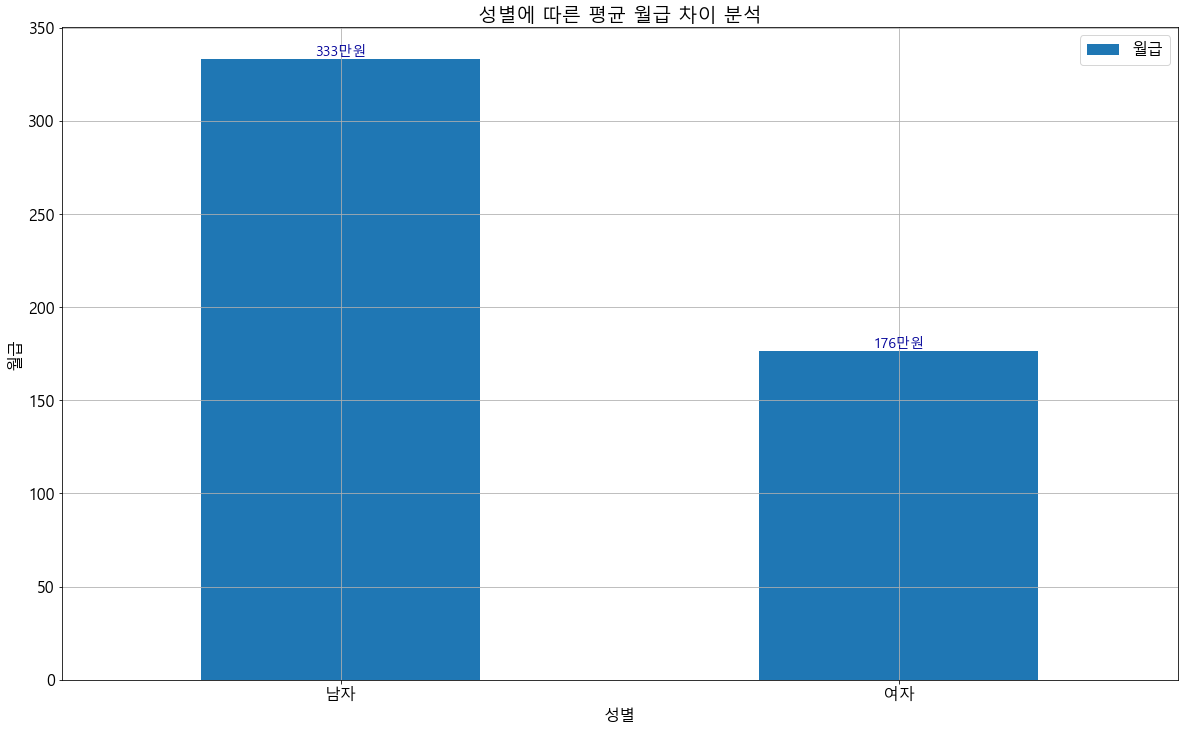

In [289]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별_월급_평균표.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("성별에 따른 평균 월급 차이 분석")
pyplot.xlabel("성별")
pyplot.ylabel("월급")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별_월급_평균표['월급'])):
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

## 분석예제 3)나이에 따른 월급 평균의 변화

1단계-데이터전처리

In [290]:
# 태어난 년도, 월급에 대한 컬럼 추출
df_filter3 = df.filter(['h12_g4','p1202_8aq1'])
df_filter3

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [291]:
# 컬럼이름 변경
df_filter3.rename(columns={'h12_g4':'태어난년도','p1202_8aq1':'월급'}, inplace =True)
df_filter3

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


나이에 대한 처리<br>
변수 검토하기

In [292]:
# 결측치 확인
df_filter3['태어난년도'].isna().sum()

0

파생변수 만들기

In [302]:
import datetime as dt
yy = dt.datetime.now().year
print(yy)
df_filter3['나이'] = yy - df_filter3['태어난년도'] + 1
df_filter3['나이'].describe()

2019


count    15422.000000
mean        51.563805
std         24.321489
min          4.000000
25%         31.000000
50%         53.000000
75%         73.000000
max        113.000000
Name: 나이, dtype: float64

월급에 대한 데이터 처리

In [304]:
# 이상치 결측 처리
# ---> 0, 9999 둘 중 하나인 값을 결측치로 변경
df_filter3['월급'] = numpy.where(((df_filter3['월급'] < 1) | (df_filter3['월급'] > 9998)), numpy.nan, df_filter3['월급'])
df_filter3

,태어난년도,월급,나이
0,1936,NaN,84
1,1945,NaN,75
2,1948,NaN,72
3,1942,108.9,78
4,1923,NaN,97
...,...,...,...
15417,1967,NaN,53
15418,1992,NaN,28
15419,1995,72.0,25
15420,1998,NaN,22


### 2단계) 나이별 평균 월급 분석

In [305]:
# 결측치가 아닌 데이터만 걸러내기
df_tmp = df_filter3.dropna() 
df_tmp

,태어난년도,월급,나이
3,1942,108.9,78
10,1940,20.0,80
16,1978,322.0,42
17,1975,120.0,45
24,1975,300.0,45
...,...,...,...
15400,1966,230.0,54
15401,1962,138.0,58
15404,1993,286.0,27
15412,1956,179.0,64


In [306]:
# 나이별로 그룹화하여 그룹별 평균 구하기
나이_월급_평균표 = df_tmp.filter(['나이','월급']).groupby('나이').mean()
나이_월급_평균표

,월급
나이,
22,89.333333
23,136.720000
24,140.807692
25,138.000000
26,145.652000
...,...
88,21.200000
89,25.000000
90,20.000000


3단계)시각화

Text(0, 0.5, '평균월급')

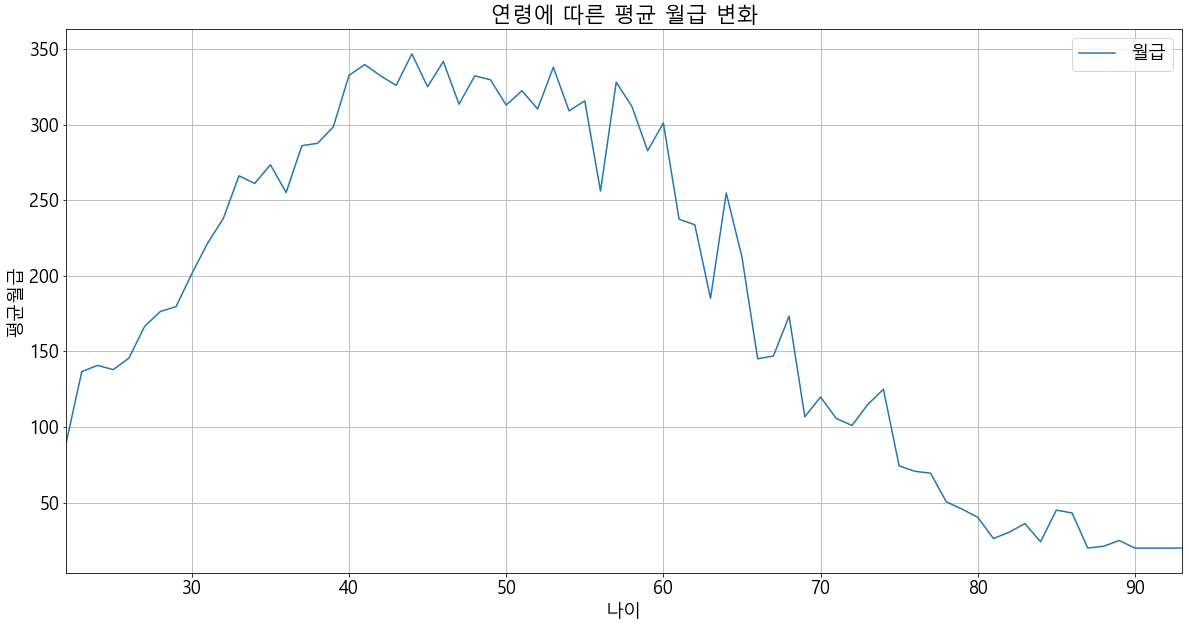

In [307]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


나이_월급_평균표.plot()
pyplot.grid()
pyplot.legend()
pyplot.title("연령에 따른 평균 월급 변화")
pyplot.xlabel("나이")
pyplot.ylabel("평균월급")

## 분석예제 4) 연령대별 월급 평균 분포

연령대 분포

In [308]:
# 태어난 년도 컬럼 추출
df_filter4 = df.filter(['h12_g4'])
df_filter4.rename(columns={'h12_g4':'태어난년도'}, inplace = True)
df_filter4

,태어난년도
0,1936
1,1945
2,1948
3,1942
4,1923
...,...
15417,1967
15418,1992
15419,1995
15420,1998


In [309]:
df_filter4.isna().sum()

태어난년도    0
dtype: int64

In [310]:
df_filter4['나이'] = yy - df_filter4['태어난년도'] + 1
df_filter4

,태어난년도,나이
0,1936,84
1,1945,75
2,1948,72
3,1942,78
4,1923,97
...,...,...
15417,1967,53
15418,1992,28
15419,1995,25
15420,1998,22


In [312]:
#연령대
df_filter4['연령대'] = (df_filter4['나이'] // 10) * 10
df_filter4

,태어난년도,나이,연령대
0,1936,84,80
1,1945,75,70
2,1948,72,70
3,1942,78,70
4,1923,97,90
...,...,...,...
15417,1967,53,50
15418,1992,28,20
15419,1995,25,20
15420,1998,22,20


In [313]:
연령대분포 = DataFrame(df_filter4['연령대'].value_counts())
연령대분포

,연령대
70,2286
40,2028
80,2005
50,1952
60,1902
20,1546
10,1480
30,1312
0,613
90,289


In [314]:
연령대분포.sort_index(inplace=True)
연령대분포

,연령대
0,613
10,1480
20,1546
30,1312
40,2028
50,1952
60,1902
70,2286
80,2005
90,289


In [316]:
index_after = {}
for i in list(연령대분포.index):
    index_after[i] = '%d대' % i

연령대분포.rename(index=index_after, inplace=True)
연령대분포

,연령대
0대,613
10대,1480
20대,1546
30대,1312
40대,2028
50대,1952
60대,1902
70대,2286
80대,2005
90대,289


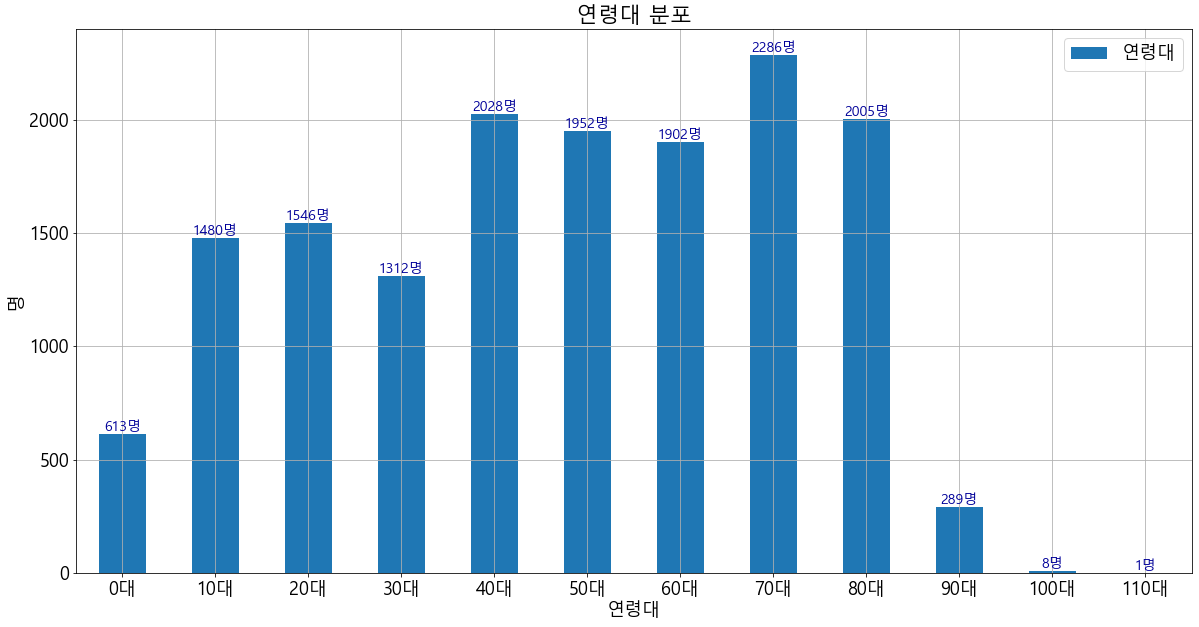

In [319]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


연령대분포.plot.bar(rot=0)
pyplot.grid()
pyplot.title("연령대 분포")
pyplot.xlabel("연령대")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(연령대분포['연령대'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()